In [160]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)


In [161]:
#path = "../Reources/Crash_Statistics_Victoria_clean.csv" 
crash_data = pd.read_csv("Resources/Crash_Statistics_Victoria_clean.csv")
crash_data.head()

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,261534,144.96980,-37.82202,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2497341.176,2408778.118,3,1,0,1,0,2,2,1,0,1,1,1,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,66573,145.14671,-37.83166,Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,2512914.561,2407698.334,2,1,0,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,261533,144.80134,-37.74003,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2482490.641,2417859.686,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,263495,145.07011,-37.17891,Non-Intersection,MITCHELL,NORTHERN REGION,2506225.129,2480145.341,3,2,0,2,0,1,1,2,0,2,1,0,0,0,0,0,0,0,0,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,261664,144.96530,-37.81808,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,2496944.686,2409215.737,3,1,0,0,1,2,3,0,0,1,2,0,0,0,0,0,0,0,0,0,No,0,2,0,1,0,1,Local Road,Metro


In [3]:
#check dimensions
crash_data.shape

(65435, 47)

In [4]:
#check missing values
crash_data.isnull().sum()

OBJECTID                0
ACCIDENT_DATE           0
ACCIDENT_TIME           0
ALCOHOLTIME             0
ACCIDENT_TYPE           0
DAY_OF_WEEK          1146
LIGHT_CONDITION         0
ROAD_GEOMETRY           0
SEVERITY                0
SPEED_ZONE              0
NODE_ID                 0
LONGITUDE               0
LATITUDE                0
NODE_TYPE               6
LGA_NAME                0
REGION_NAME             0
VICGRID_X               0
VICGRID_Y               0
TOTAL_PERSONS           0
INJ_OR_FATAL            0
FATALITY                0
SERIOUSINJURY           0
OTHERINJURY             0
NONINJURED              0
MALES                   0
FEMALES                 0
BICYCLIST               0
PASSENGER               0
DRIVER                  0
PEDESTRIAN              0
PILLION                 0
MOTORIST                0
UNKNOWN                 0
PED_CYCLIST_5_12        0
PED_CYCLIST_13_18       0
OLD_PEDESTRIAN          0
OLD_DRIVER              0
YOUNG_DRIVER            0
ALCOHOL_RELA

In [5]:
#remove NA values based on row
crash_data = crash_data.dropna(axis = 0)

In [6]:
#check missing values
crash_data.isnull().sum()


OBJECTID             0
ACCIDENT_DATE        0
ACCIDENT_TIME        0
ALCOHOLTIME          0
ACCIDENT_TYPE        0
DAY_OF_WEEK          0
LIGHT_CONDITION      0
ROAD_GEOMETRY        0
SEVERITY             0
SPEED_ZONE           0
NODE_ID              0
LONGITUDE            0
LATITUDE             0
NODE_TYPE            0
LGA_NAME             0
REGION_NAME          0
VICGRID_X            0
VICGRID_Y            0
TOTAL_PERSONS        0
INJ_OR_FATAL         0
FATALITY             0
SERIOUSINJURY        0
OTHERINJURY          0
NONINJURED           0
MALES                0
FEMALES              0
BICYCLIST            0
PASSENGER            0
DRIVER               0
PEDESTRIAN           0
PILLION              0
MOTORIST             0
UNKNOWN              0
PED_CYCLIST_5_12     0
PED_CYCLIST_13_18    0
OLD_PEDESTRIAN       0
OLD_DRIVER           0
YOUNG_DRIVER         0
ALCOHOL_RELATED      0
UNLICENCSED          0
NO_OF_VEHICLES       0
HEAVYVEHICLE         0
PASSENGERVEHICLE     0
MOTORCYCLE 

In [7]:
#check data dimensions
crash_data.shape

(63037, 47)

In [8]:
#load local government expenditure data, skip first row
localgov = pd.read_csv("Resources/lge_cleanfile.csv", skiprows = 1)
localgov.head(10)

,LGA_NAME_ALL,Local Roads - Sealed-length,Local Roads - Unsealed - Formed & Sheeted-length,Local Roads - Unsealed - Natural Surface_length,Total_roadlength,Local Roads - Sealed-expenditure,Local Roads - Unsealed - Formed & Sheeted-expenditure,Local Roads - Unsealed - Natural Surface-expenditure,Roads Ancillary-expenditure,Total-expenditure
0,Alpine,412,233,215,860,"3,748,129","265,116",0,0,"4,013,244"
1,Ararat,764,"1,420",240,"2,424","7,303,459","2,975,868","2,281","1,361,455","11,845,829"
2,Ballarat,"1,044",351,40,"1,435","41,874,084","3,196,942","363,289","1,045,194","46,775,611"
3,Banyule,538,6,1,545,"10,329,600",0,0,0,"10,329,600"
4,Bass Coast,563,373,7,943,"7,355,926","1,677,983",0,"789,457","9,923,525"
5,Baw Baw,"1,110",721,184,"2,015","13,512,590","3,092,182",0,"1,493,686","19,073,493"
6,Bayside,355,1,0,356,"5,547,236",0,0,"6,045,707","11,592,943"
7,Benalla,560,713,78,"1,351","2,504,772","1,474,785",0,0,"3,979,557"
8,Boroondara,562,0,0,562,"11,436,082",0,0,0,"11,436,082"
9,Brimbank,889,5,0,894,"25,715,082","344,474",0,"1,997,635","28,078,056"


In [9]:
#check dimensions
localgov.shape

(79, 10)

In [10]:
#check null values
localgov.isnull().sum()

LGA_NAME_ALL                                              0
Local Roads - Sealed-length                               0
Local Roads - Unsealed - Formed &  Sheeted-length         0
Local Roads - Unsealed - Natural Surface_length           0
Total_roadlength                                          0
Local Roads - Sealed-expenditure                          0
Local Roads - Unsealed - Formed &  Sheeted-expenditure    0
Local Roads - Unsealed - Natural Surface-expenditure      0
Roads Ancillary-expenditure                               0
Total-expenditure                                         0
dtype: int64

In [11]:
#unique lGA names on local gov dataset
localgov["LGA_NAME_ALL"].nunique()
localgov["LGA_NAME_ALL"].value_counts()

Benalla                1
Pyrenees               1
Greater Shepparton     1
Greater Geelong        1
Port Phillip           1
                      ..
Gannawarra             1
West Wimmera           1
Hepburn                1
Hume                   1
Wodonga                1
Name: LGA_NAME_ALL, Length: 79, dtype: int64

In [12]:
# Load in the csv data files
LGA_demo_path = "Resources/lga_demographics.csv"

# Read the weather data 
lga_demo_df = pd.read_csv(LGA_demo_path)

In [13]:
#Check the datafram import
lga_demo_df

,LGA Name,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),...,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,...,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,...,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,...,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,...,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,...,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,Regional,975,26,0.376,17,0.373,67,...,5,0.000,0,0.531,18,0.118,63,3.4,60,39347
75,WYNDHAM,27260,Western Metropolitan,Metro,1013,55,0.193,45,0.369,69,...,20,0.262,1,0.347,73,0.174,21,4.4,45,217118
76,YARRA,27350,Northern Metropolitan,Metro,1019,57,0.121,55,0.292,77,...,78,0.034,52,0.551,12,0.148,43,7.3,14,86652
77,YARRA RANGES,27450,Eastern Metropolitan,Metro,1037,63,0.072,62,0.378,59,...,19,0.175,10,0.448,47,0.152,37,6.4,23,149542


In [14]:
lga_demo_df.dtypes

LGA Name                                                                                     object
LGA Code                                                                                      int64
Departmental Region                                                                          object
City_Regional                                                                                object
Index of Relative Socio-Economic Disadvantage (IRSD)                                          int64
Index of Relative Socio-Economic Disadvantage (IRSD) (rank)                                   int64
Percentage of highly disadvantaged SA1s                                                     float64
Percentage of highly disadvantaged SA1s (rank)                                                int64
People with income less than $400 per week                                                  float64
People with income less than $400 per week (rank)                                             int64


In [15]:
#Rename the column name LGA Name to LGA
lga_demo_df2 = lga_demo_df.rename(columns={"LGA Name": "LGA"})


In [16]:
lga_demo_df2

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),...,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,...,77,0.083,35,0.561,6,0.193,10,1.0,78,12335
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,...,38,0.000,0,0.482,31,0.144,45,11.5,4,11599
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,...,15,0.047,47,0.537,15,0.123,60,5.5,31,101689
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,...,55,0.206,5,0.407,64,0.167,31,3.7,54,121869
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,...,25,0.068,40,0.452,44,0.177,20,7.1,17,32806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,Regional,975,26,0.376,17,0.373,67,...,5,0.000,0,0.531,18,0.118,63,3.4,60,39347
75,WYNDHAM,27260,Western Metropolitan,Metro,1013,55,0.193,45,0.369,69,...,20,0.262,1,0.347,73,0.174,21,4.4,45,217118
76,YARRA,27350,Northern Metropolitan,Metro,1019,57,0.121,55,0.292,77,...,78,0.034,52,0.551,12,0.148,43,7.3,14,86652
77,YARRA RANGES,27450,Eastern Metropolitan,Metro,1037,63,0.072,62,0.378,59,...,19,0.175,10,0.448,47,0.152,37,6.4,23,149542


In [17]:
crash_demographics = crash_data.copy()

In [18]:
crash_demographics

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,...,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,1,0,Local Road,Metro


In [19]:
#Delete the row with a MOUNT BULLER ALPINE RESOR Statistic
crash_demographics[crash_demographics.LGA_NAME != 'MOUNT BULLER ALPINE RESOR']

,OBJECTID,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,LIGHT_CONDITION,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,...,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,RMA,STAT_DIV_NAME
0,3401744,1/07/2013,18.30.00,Yes,Struck Pedestrian,Monday,Dark Street lights on,Not at intersection,Serious injury accident,60 km/hr,...,0,No,0,1,0,1,0,0,Local Road,Metro
1,3401745,2/07/2013,16.40.00,No,Collision with vehicle,Tuesday,Day,T intersection,Serious injury accident,60 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
2,3401746,2/07/2013,13.15.00,No,Collision with a fixed object,Tuesday,Day,T intersection,Serious injury accident,50 km/hr,...,0,Yes,0,1,0,1,0,0,Local Road,Metro
3,3401747,2/07/2013,16.45.00,No,Collision with a fixed object,Tuesday,Day,Not at intersection,Serious injury accident,110 km/hr,...,0,No,0,1,0,1,0,0,Freeway,Country
4,3401748,2/07/2013,15.48.00,No,Collision with vehicle,Tuesday,Day,Not at intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,0,1,Local Road,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65430,3467273,22/05/2018,15.44.00,No,Collision with vehicle,Tuesday,Day,Cross intersection,Other injury accident,60 km/hr,...,1,No,0,2,0,2,0,0,Arterial Highway,Country
65431,3467274,22/05/2018,17.32.00,No,Collision with vehicle,Tuesday,Dusk/Dawn,Not at intersection,Other injury accident,70 km/hr,...,0,No,0,3,0,3,0,0,Arterial Other,Metro
65432,3467275,22/05/2018,17.26.00,No,Collision with vehicle,Tuesday,Dark No street lights,Not at intersection,Other injury accident,60 km/hr,...,0,No,0,2,1,1,0,0,Arterial Other,Metro
65433,3467276,13/12/2017,16.35.00,No,Vehicle overturned (no collision),Wednesday,Day,T intersection,Other injury accident,50 km/hr,...,0,No,0,2,0,1,1,0,Local Road,Metro


### Final tidy up of the data to get ready for analysis

In [20]:
#Create a new DataFrame to enable work below (cleaned)
crash_demographic_clean = crash_demographics[["OBJECTID", "LGA_NAME", "TOTAL_PERSONS", "INJ_OR_FATAL", "FATALITY", "SERIOUSINJURY", "OTHERINJURY", "NONINJURED", "ALCOHOL_RELATED", "MALES", "FEMALES", "OLD_DRIVER", "YOUNG_DRIVER"]]


In [21]:
#Group data to calculate the number of crashes per LGA (excluding alcohol related crashes)
LGA_crash_count = crash_demographic_clean.groupby(["LGA_NAME"])["OBJECTID"].count()
LGA_total_inj = crash_demographic_clean.groupby(["LGA_NAME"])["TOTAL_PERSONS"].sum()
LGA_total_inj_or_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["INJ_OR_FATAL"].sum()
LGA_total_fatal = crash_demographic_clean.groupby(["LGA_NAME"])["FATALITY"].sum()
LGA_total_serious = crash_demographic_clean.groupby(["LGA_NAME"])["SERIOUSINJURY"].sum()
LGA_total_minor = crash_demographic_clean.groupby(["LGA_NAME"])["OTHERINJURY"].sum()
LGA_total_no_injury = crash_demographic_clean.groupby(["LGA_NAME"])["NONINJURED"].sum()
LGA_total_male = crash_demographic_clean.groupby(["LGA_NAME"])["MALES"].sum()
LGA_total_female = crash_demographic_clean.groupby(["LGA_NAME"])["FEMALES"].sum()
LGA_total_old = crash_demographic_clean.groupby(["LGA_NAME"])["OLD_DRIVER"].sum()
LGA_total_young = crash_demographic_clean.groupby(["LGA_NAME"])["YOUNG_DRIVER"].sum()

In [22]:
#Calculate the number of alcohol related crashes and group by lGA 
LGA_count_alcohol = crash_demographic_clean.loc[crash_demographic_clean["ALCOHOL_RELATED"] == "Yes"]
LGA_total_alcohol = LGA_count_alcohol.groupby(["LGA_NAME"])["ALCOHOL_RELATED"].count()

In [23]:
#Create a new grouped dataframe 
grouped_LGA_totals = pd.DataFrame({"total_crashes": LGA_crash_count,
                                  "total_inj": LGA_total_inj,
                                  "inj_fatal": LGA_total_inj_or_fatal,
                                   "fatal": LGA_total_fatal,
                                   "serious": LGA_total_serious,
                                   "minor": LGA_total_minor,
                                   "no_inj": LGA_total_no_injury,
                                   "alcohol": LGA_total_alcohol,
                                   "male": LGA_total_male,
                                   "female": LGA_total_female,
                                   "old_driver": LGA_total_old,
                                   "young_driver": LGA_total_young
                                  })

In [24]:
#Replace the NaN in the file with a 0
grouped_LGA_totals["alcohol"] = grouped_LGA_totals["alcohol"].fillna(0)

In [25]:
grouped_LGA_totals.tail(20)

,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver
QUEENSCLIFFE,8,20,9,0,2,7,11,0.0,11,8,2,2
SHEPPARTON,752,1899,1075,29,366,680,824,37.0,1062,749,54,264
SOUTH GIPPSLAND,448,878,607,22,170,415,271,23.0,494,364,28,133
SOUTHERN GRAMPIANS,150,283,195,8,88,99,88,6.0,151,122,15,34
STONNINGTON,1407,3275,1606,7,406,1193,1669,32.0,1834,1270,90,347
STRATHBOGIE,205,438,297,15,138,144,141,9.0,265,163,13,51
SURF COAST,391,835,501,15,177,309,334,17.0,490,308,25,112
SWAN HILL,217,514,311,11,97,203,203,20.0,289,209,26,60
TOWONG,148,221,183,4,77,102,38,5.0,158,58,3,23
WANGARATTA,299,582,404,16,132,256,178,15.0,347,218,32,75


In [26]:
#Set the index
group_LGA = grouped_LGA_totals.rename_axis("LGA").reset_index()

In [162]:
group_LGA.head(50)

,LGA,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver
0,ALPINE,227,437,281,4,93,184,156,6.0,274,147,19,27
1,ARARAT,150,344,221,8,71,142,123,5.0,207,132,13,35
2,BALLARAT,1134,2918,1531,20,316,1195,1387,56.0,1412,1345,101,406
3,BANYULE,909,2224,1127,10,247,870,1097,18.0,1158,973,81,289
4,BASS COAST,340,878,485,11,142,332,393,20.0,470,386,32,95
5,BAW BAW,780,1404,950,16,292,642,454,28.0,848,515,37,208
6,BAYSIDE,799,1882,964,12,290,662,918,20.0,1028,793,107,177
7,BENALLA,192,484,249,10,96,143,235,5.0,267,200,21,52
8,BENDIGO,1282,2941,1610,23,426,1161,1331,53.0,1522,1307,104,432
9,BOROONDARA,1440,3312,1630,14,384,1232,1682,37.0,1791,1368,117,358


In [28]:
#Merge the Database to do the demographics analysis
LGA_merged = pd.merge(lga_demo_df2, group_LGA, how="outer", on="LGA")

In [29]:
LGA_merged

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),...,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,...,281,4,93,184,156,6.0,274,147,19,27
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,...,221,8,71,142,123,5.0,207,132,13,35
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,...,1531,20,316,1195,1387,56.0,1412,1345,101,406
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,...,1127,10,247,870,1097,18.0,1158,973,81,289
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,...,485,11,142,332,393,20.0,470,386,32,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,WODONGA,27170,Hume,Regional,975,26,0.376,17,0.373,67,...,350,9,93,248,250,3.0,306,265,19,93
75,WYNDHAM,27260,Western Metropolitan,Metro,1013,55,0.193,45,0.369,69,...,1737,25,460,1252,1784,45.0,1999,1313,46,490
76,YARRA,27350,Northern Metropolitan,Metro,1019,57,0.121,55,0.292,77,...,1722,6,431,1285,1764,19.0,1964,1299,35,280
77,YARRA RANGES,27450,Eastern Metropolitan,Metro,1037,63,0.072,62,0.378,59,...,2413,34,741,1638,1637,82.0,2268,1578,124,565


In [30]:
#Add in additional column to represent the total crashes per person in Victoria
LGA_merged["crash_per_person"] = LGA_merged["total_crashes"] / LGA_merged["Total_pop"]

In [178]:
LGA_merged

,LGA,LGA Code,Departmental Region,City_Regional,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,Median house price (rank),Journeys to work which are by car,Journeys to work which are by car (rank),People with at least 2 hour daily commute,People with at least 2 hour daily commute (rank),People at increased risk of alcohol-related harm on a single occasion of drinking,People at increased risk of alcohol-related harm on a single occasion of drinking (rank),People reporting fair or poor health status,People reporting fair or poor health status (rank),"Clients that received Alcohol & Drug Treatment Services per 1,000 population","Clients that received Alcohol & Drug Treatment Services per 1,000 population (rank)",Total_pop,total_crashes,total_inj,inj_fatal,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver,crash_per_person
0,ALPINE,20110,Hume,Regional,987,35,0.238,33,0.448,21,829,67,265000,50,0.439,77,0.083,35,0.561,6,0.193,10,1.0,78,12335,227,437,281,4,93,184,156,6.0,274,147,19,27,0.018403
1,ARARAT,20260,Grampians,Regional,951,11,0.455,8,0.433,30,844,64,193000,68,0.687,38,0.000,0,0.482,31,0.144,45,11.5,4,11599,150,344,221,8,71,142,123,5.0,207,132,13,35,0.012932
2,BALLARAT,20570,Grampians,Regional,981,29,0.315,23,0.417,39,988,44,294000,48,0.738,15,0.047,47,0.537,15,0.123,60,5.5,31,101689,1134,2918,1531,20,316,1195,1387,56.0,1412,1345,101,406,0.011152
3,BANYULE,20660,Northern Metropolitan,Metro,1047,67,0.083,60,0.369,68,1394,12,620000,17,0.641,55,0.206,5,0.407,64,0.167,31,3.7,54,121869,909,2224,1127,10,247,870,1097,18.0,1158,973,81,289,0.007459
4,BASS COAST,20740,Gippsland,Regional,978,27,0.216,36,0.438,26,855,61,340000,38,0.714,25,0.068,40,0.452,44,0.177,20,7.1,17,32806,340,878,485,11,142,332,393,20.0,470,386,32,95,0.010364
5,BAW BAW,20830,Gippsland,Regional,998,47,0.152,54,0.415,41,1025,40,309000,44,0.699,32,0.108,25,0.429,59,0.129,58,5.1,35,48477,780,1404,950,16,292,642,454,28.0,848,515,37,208,0.016090
6,BAYSIDE,20910,Southern Metropolitan,Metro,1091,77,0.023,73,0.327,76,1826,3,1250000,3,0.627,57,0.141,20,0.505,23,0.085,78,2.8,67,97092,799,1882,964,12,290,662,918,20.0,1028,793,107,177,0.008229
7,BENALLA,21010,Hume,Regional,957,16,0.297,26,0.448,22,827,69,235500,59,0.693,34,0.000,0,0.402,66,0.098,71,3.2,62,13863,192,484,249,10,96,143,235,5.0,267,200,21,52,0.013850
8,BOROONDARA,21110,Eastern Metropolitan,Metro,1098,78,0.008,75,0.333,75,1893,1,1550000,1,0.566,68,0.055,43,0.488,28,0.103,68,2.5,70,167232,1440,3312,1630,14,384,1232,1682,37.0,1791,1368,117,358,0.008611
9,BRIMBANK,21180,Western Metropolitan,Metro,926,3,0.591,3,0.483,6,1106,34,405000,28,0.715,24,0.167,11,0.338,74,0.238,3,6.3,24,194315,1960,5160,2446,33,633,1780,2714,61.0,2864,1988,92,653,0.010087


### Calculate and plot the overall statistics for the number of crashes per Local Government Agency

In [32]:
#Show the overall general statistics for a quick perusal
LGA_merged.describe()

,LGA Code,Index of Relative Socio-Economic Disadvantage (IRSD),Index of Relative Socio-Economic Disadvantage (IRSD) (rank),Percentage of highly disadvantaged SA1s,Percentage of highly disadvantaged SA1s (rank),People with income less than $400 per week,People with income less than $400 per week (rank),Median household income,Median household income (rank),Median house price,...,fatal,serious,minor,no_inj,alcohol,male,female,old_driver,young_driver,crash_per_person
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24030.632911,996.746835,40.012658,0.230633,39.898734,0.414823,40.000000,1102.607595,39.949367,4.342945e+05,...,15.531646,274.265823,719.810127,895.886076,27.430380,1051.468354,760.493671,51.468354,240.291139,0.012403
std,2165.418975,44.637419,22.952847,0.167600,22.838673,0.052703,22.949219,289.089039,22.908905,3.084959e+05,...,8.378598,214.450025,659.973097,966.182947,20.736246,1000.340145,725.126866,45.871011,231.745005,0.005436
min,20110.000000,895.000000,1.000000,0.000000,1.000000,0.241000,1.000000,685.000000,1.000000,9.000000e+04,...,0.000000,2.000000,7.000000,11.000000,0.000000,11.000000,8.000000,2.000000,2.000000,0.002803
25%,22210.000000,964.500000,20.500000,0.089500,20.500000,0.378000,20.500000,882.000000,20.500000,2.327500e+05,...,9.500000,97.000000,183.500000,150.500000,11.500000,273.500000,180.000000,16.000000,56.500000,0.009294
50%,24210.000000,993.000000,40.000000,0.212000,40.000000,0.417000,40.000000,1025.000000,40.000000,3.300020e+05,...,15.000000,237.000000,480.000000,417.000000,22.000000,708.000000,483.000000,32.000000,158.000000,0.010650
75%,25945.000000,1025.000000,59.500000,0.354500,59.500000,0.449000,59.500000,1297.500000,59.000000,5.895000e+05,...,21.000000,385.500000,1172.500000,1476.000000,39.500000,1640.000000,1303.000000,83.000000,363.000000,0.013950
max,27630.000000,1098.000000,79.000000,0.767000,76.000000,0.542000,79.000000,1893.000000,79.000000,1.550000e+06,...,35.000000,974.000000,3162.000000,4787.000000,97.000000,5233.000000,3070.000000,201.000000,1016.000000,0.037072


In [33]:
#Create a copy of the DF and then sort the values by total crashes in ascending by LGA
total_lga_plot = LGA_merged.copy()
total_lga_plot = total_lga_plot.sort_values("total_crashes")

In [34]:
#Calculate the average crashes for plotting
average_crash_plot = int(total_lga_plot["total_crashes"].mean())
print("Ave crashes per LGA: ", average_crash_plot)

Ave crashes per LGA:  797


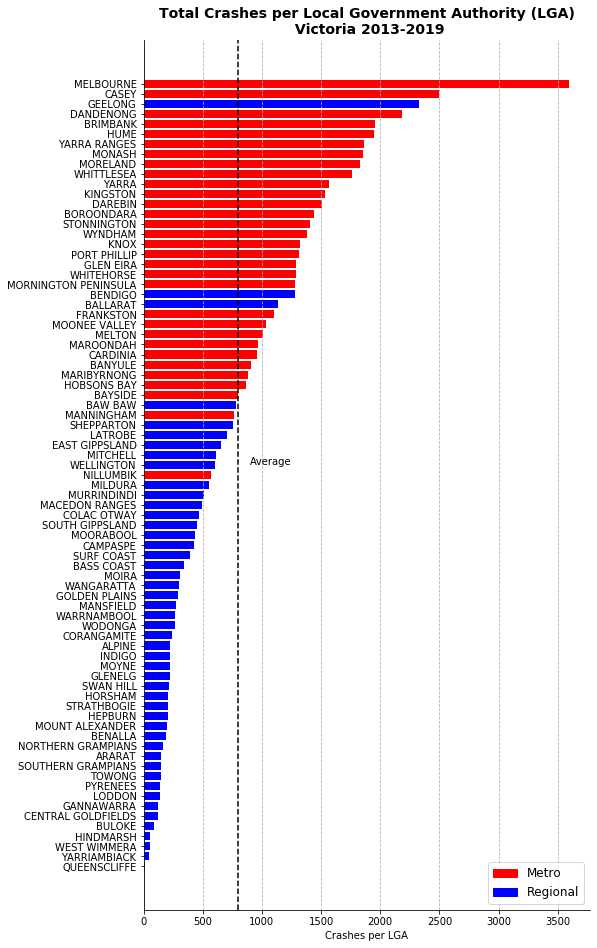

In [201]:
#Create a horizonal plot by LGA
plt.figure(figsize=(8,16))
colours = np.where(total_lga_plot["City_Regional"] == "Metro", "r", "b")
plt.barh(total_lga_plot["LGA"], total_lga_plot["total_crashes"], color=colours)

plt.title('Total Crashes per Local Government Authority (LGA)\n Victoria 2013-2019', fontsize=14, fontweight="bold")
plt.xlabel("Crashes per LGA")

metro_patch_legend = mpatches.Patch(color="red", label="Metro")
regional_patch_legend = mpatches.Patch(color="blue", label="Regional")
plt.legend(handles=[metro_patch_legend, regional_patch_legend], loc="lower right", fontsize=12)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axvline(x=797, label='Average', c="black", linestyle="--")
plt.annotate('Average',(900,40))

plt.gca().xaxis.grid(True, linestyle='--')

plt.savefig("../total_crashes.png")
plt.show()

Visualise the spread of the dataset for total crashes in LGA's

In [36]:
#Explore the key stats for a box and whisker
crashesQ1 = np.percentile(LGA_merged["total_crashes"], 25, interpolation = 'midpoint') 
crashesQ2 = np.percentile(LGA_merged["total_crashes"], 50, interpolation = 'midpoint') 
crashesQ3 = np.percentile(LGA_merged["total_crashes"], 75, interpolation = 'midpoint') 

IQR_crashes = st.iqr(LGA_merged["total_crashes"], interpolation = 'midpoint')
IQRUp_crashes = crashesQ3 + (1.5 * IQR_crashes)
IQRDown_crashes = crashesQ1 - (1.5 * IQR_crashes)

print('Q1 25 percentile of the given data is, ', crashesQ1) 
print('Q1 50 percentile of the given data is, ', crashesQ2) 
print('Q1 75 percentile of the given data is, ', crashesQ3) 

print('Interquartile range is', IQR_crashes)
print('The upper limit for outliers is,', IQRUp_crashes)
print('The lower limit for outliers is,', IQRDown_crashes)

Q1 25 percentile of the given data is,  223.5
Q1 50 percentile of the given data is,  573.0
Q1 75 percentile of the given data is,  1286.5
Interquartile range is 1063.0
The upper limit for outliers is, 2881.0
The lower limit for outliers is, -1371.0


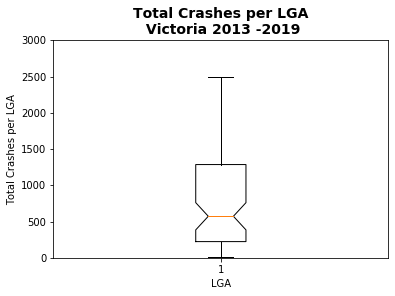

In [37]:
#Explore on a box and whisker
green_diamond = dict(markerfacecolor='g', marker='D')
crashes1, crashes_ax1 = plt.subplots()
crashes_ax1.set_title('Total Crashes per LGA\n Victoria 2013 -2019', fontsize=14, fontweight="bold")
crashes_ax1.set_ylabel('Total Crashes per LGA')
crashes_ax1.set_xlabel('LGA')

crashes_ax1.boxplot(LGA_merged["total_crashes"], notch=True, flierprops=green_diamond)
plt.ylim(0,3000)
plt.show()

Explore crashes by LGA population for an overall persepective

In [38]:
#Calculate the correlation coefficient to see if there is a correlation between total population and the number of crashes
round(st.pearsonr(LGA_merged["Total_pop"], LGA_merged["total_crashes"])[0], 2)

0.89

In [39]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
summary_slope, summary_int, summary_r, summary_p, summary_std_err = stats.linregress(LGA_merged["Total_pop"], LGA_merged["total_crashes"])

In [40]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
pop_summary_fit = summary_slope * LGA_merged["Total_pop"] + summary_int

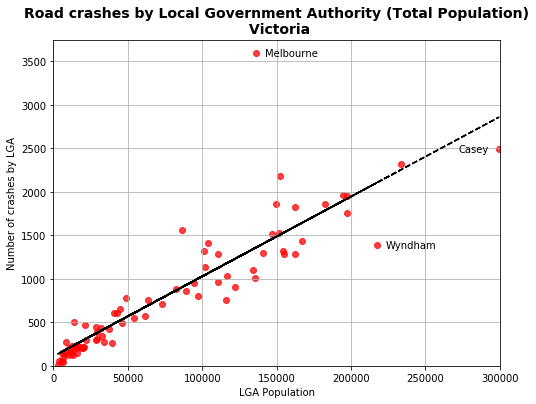

In [206]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["Total_pop"], LGA_merged["total_crashes"], facecolors=["red"], alpha = 0.75)
plt.plot(LGA_merged["Total_pop"], pop_summary_fit, "--", color="black")

plt.xlabel("LGA Population")
plt.ylabel("Number of crashes by LGA")
plt.title("Road crashes by Local Government Authority (Total Population)\n Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(142500,3560))
plt.annotate('Casey',(272000,2450))
plt.annotate('Wyndham',(223000,1350))

plt.xlim(0,300000)
plt.ylim(0,3750)
plt.grid()
plt.show()

Explore total crashes by LGA Index of Relative Socio-Economic Disadvantage (IRSD) - economic index

In [42]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])[0], 2)

0.25

In [43]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
IRSD_slope, IRSD_int, IRSD_r, IRSD_p, IRSD_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"])

In [44]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
IRSD_summary_fit = IRSD_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + IRSD_int

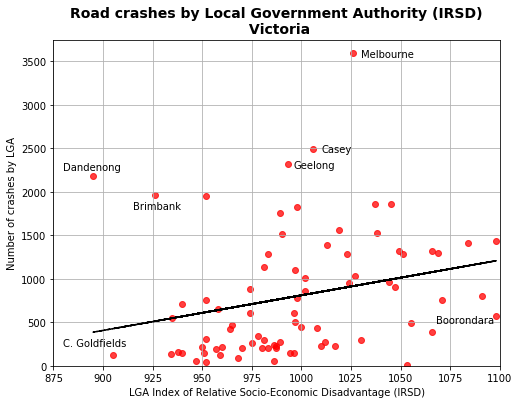

In [220]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["total_crashes"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], IRSD_summary_fit, "--", color="black")

plt.xlabel("LGA Index of Relative Socio-Economic Disadvantage (IRSD)")
plt.ylabel("Number of crashes by LGA")
plt.title("Road crashes by Local Government Authority (IRSD)\n Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(1030,3550))
plt.annotate('Dandenong',(880, 2250))
plt.annotate('Boorondara',(1068, 493))
plt.annotate('Brimbank',(915, 1800))
plt.annotate('C. Goldfields',(880, 230))
plt.annotate('Casey',(1010, 2450))
plt.annotate('Geelong',(996, 2277))

plt.xlim(875,1100)
plt.ylim(0,3750)
plt.grid()
plt.show()

Explore total crashes by each LGA's median income

In [46]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Median household income"], LGA_merged["total_crashes"])[0], 2)

0.54

In [47]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
med_income_slope, med_income_int, med_income_r, med_income_p, med_income_std_err = stats.linregress(LGA_merged["Median household income"], LGA_merged["total_crashes"])

In [48]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
med_income_fit = med_income_slope * LGA_merged["Median household income"] + med_income_int

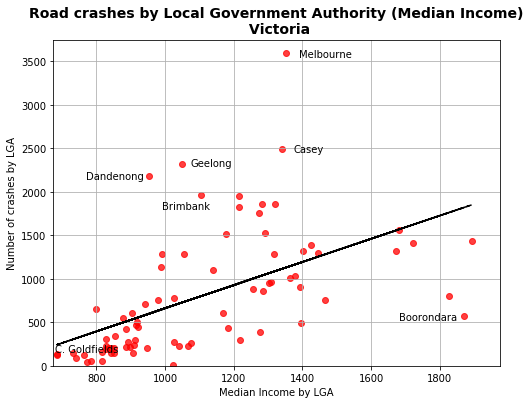

In [213]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["Median household income"], LGA_merged["total_crashes"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Median household income"], med_income_fit, "--", color="black")

plt.xlabel("Median Income by LGA")
plt.ylabel("Number of crashes by LGA")
plt.title("Road crashes by Local Government Authority (Median Income)\n Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(1390,3550))
plt.annotate('Dandenong',(770, 2150))
plt.annotate('Boorondara',(1680, 525))
plt.annotate('Brimbank',(990, 1800))
plt.annotate('C. Goldfields',(680, 160))
plt.annotate('Casey',(1375, 2450))
plt.annotate('Geelong',(1075, 2300))

plt.xlim(675,1975)
plt.ylim(0,3750)
plt.grid()
plt.show()

Number of alcohol incidents by socio economic status of LGA


In [50]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])[0], 2)

0.09

In [51]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
booze_slope, booze_int, booze_r, booze_p, booze_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"])

In [52]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
booze_fit = booze_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + booze_int

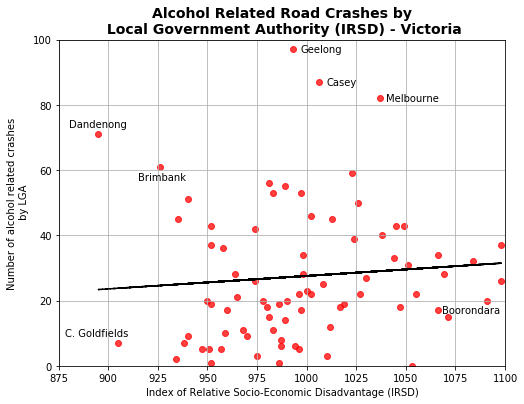

In [172]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["alcohol"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], booze_fit, "--", color="black")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)")
plt.ylabel("Number of alcohol related crashes\n by LGA")
plt.title("Alcohol Related Road Crashes by\n Local Government Authority (IRSD) - Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(1040,81))
plt.annotate('Dandenong',(880, 73))
plt.annotate('Boorondara',(1068, 16))
plt.annotate('Brimbank',(915, 57))
plt.annotate('C. Goldfields',(878, 9))
plt.annotate('Casey',(1010, 86))
plt.annotate('Geelong',(997, 96))


plt.xlim(875,1100)
plt.ylim(0,100)
plt.grid()
plt.show()

Number of alcohol incidents by people reporting to be of fair or poor health in each LGA

In [54]:
#Calculate the correlation coefficient to see if there is a correlation between the health in a LGA and the number of crashes
round(st.pearsonr(LGA_merged["People reporting fair or poor health status"], LGA_merged["total_crashes"])[0], 2)

0.26

In [55]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
health_slope, health_int, health_r, health_p, health_std_err = stats.linregress(LGA_merged["total_crashes"], LGA_merged["People reporting fair or poor health status"])

In [56]:
#Equation of the line to calculate the predicted number of crashes for the people of fair or poor health in victoria by LGA
health_fit = health_slope * LGA_merged["total_crashes"] + health_int

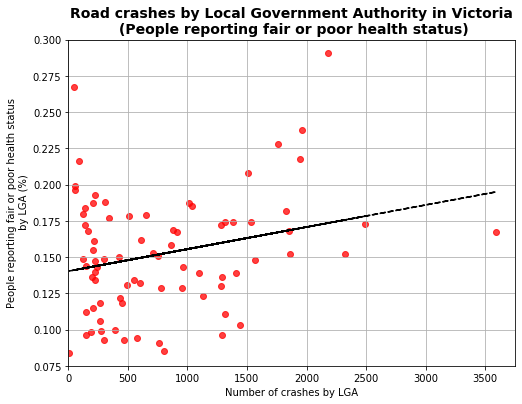

In [174]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["total_crashes"], LGA_merged["People reporting fair or poor health status"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["total_crashes"], health_fit, "--", color="black")

plt.xlabel("Number of crashes by LGA")
plt.ylabel("People reporting fair or poor health status\n by LGA (%)")
plt.title("Road crashes by Local Government Authority in Victoria\n (People reporting fair or poor health status)", fontsize=14, fontweight="bold")

plt.xlim(0,3750)
plt.ylim(0.075,.3)
plt.grid()
plt.show()

Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) to socio factors

In [58]:
#Calculate the correlation coefficient to see if there is a correlation between socio status and the number of crashes
round(st.pearsonr(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])[0], 2)

-0.15

In [59]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
cpp_slope, cpp_int, cpp_r, cpp_p, cpp_std_err = stats.linregress(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"])

In [60]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
cpp_fit = cpp_slope * LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"] + cpp_int

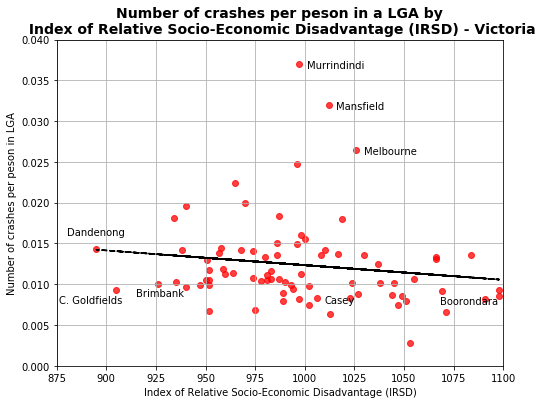

In [192]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], LGA_merged["crash_per_person"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["Index of Relative Socio-Economic Disadvantage (IRSD)"], cpp_fit, "--", color="black")

plt.xlabel("Index of Relative Socio-Economic Disadvantage (IRSD)")
plt.ylabel("Number of crashes per peson in LGA")
plt.title("Number of crashes per peson in a LGA by\n Index of Relative Socio-Economic Disadvantage (IRSD) - Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(1030,0.026))
plt.annotate('Dandenong',(880, 0.016))
plt.annotate('Boorondara',(1068, 0.0075))
plt.annotate('Brimbank',(915, 0.0085))
plt.annotate('C. Goldfields',(876, .0077))
plt.annotate('Casey',(1010, 0.0077))
plt.annotate('Murrindindi',(1001, 0.0365))
plt.annotate('Mansfield',(1016, 0.0315))



plt.xlim(875,1100)
plt.ylim(0,0.04)
plt.grid()
plt.show()

Represent the crashes per person in an LGA to see if there are more or less crashes per person (cpp) for LGA alcohol factors

In [62]:
#Calculate the correlation coefficient to see if there is a correlation between alcohol related incidents
#and the number of crashes person
round(st.pearsonr(LGA_merged["alcohol"], LGA_merged["crash_per_person"])[0], 2)

-0.18

In [63]:
#Calculate the linear regression for the total number of crashes for the population of victoria by LGA
cpp_alcohol_slope, cpp_alcohol_int, cpp_alcohol_r, cpp_alcohol_p, cpp_alcohol_std_err = stats.linregress(LGA_merged["alcohol"], LGA_merged["crash_per_person"])

In [64]:
#Equation of the line to calculate the predicted number of crashes for the population of victoria by LGA
cpp_alcohol_fit = cpp_alcohol_slope * LGA_merged["alcohol"] + cpp_alcohol_int

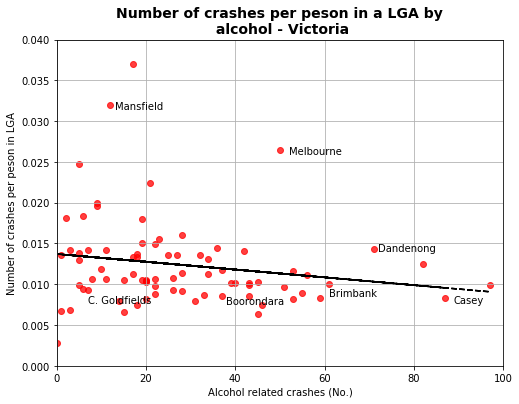

In [198]:
#Plot the linear model on the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(LGA_merged["alcohol"], LGA_merged["crash_per_person"], facecolors="red", alpha = 0.75)
plt.plot(LGA_merged["alcohol"], cpp_alcohol_fit, "--", color="black")

plt.xlabel("Alcohol related crashes (No.)")
plt.ylabel("Number of crashes per peson in LGA")
plt.title("Number of crashes per peson in a LGA by\n alcohol - Victoria", fontsize=14, fontweight="bold")

plt.annotate('Melbourne',(52,0.026))
plt.annotate('Dandenong',(72, 0.014))
plt.annotate('Boorondara',(38, 0.0075))
plt.annotate('Brimbank',(61, 0.0085))
plt.annotate('C. Goldfields',(7, .0077))
plt.annotate('Casey',(89, 0.0077))
plt.annotate('Mansfield',(13, 0.0315))


plt.xlim(0,100)
plt.ylim(0,0.04)
plt.grid()
plt.show()

#### Work out overall statistics - by age and gender classifications (Young, Older, Middle Aged)

In [86]:
#Group data to calculate the number of crashes per region (excluding alcohol related crashes)
region_crash_count2 = LGA_merged.groupby(["Departmental Region", "City_Regional"])["total_crashes"].sum()
region_total_injuries = LGA_merged.groupby(["Departmental Region", "City_Regional"])["total_inj"].sum()
region_total_male = LGA_merged.groupby(["Departmental Region", "City_Regional"])["male"].sum()
region_total_female = LGA_merged.groupby(["Departmental Region", "City_Regional"])["female"].sum()
region_total_old = LGA_merged.groupby(["Departmental Region", "City_Regional"])["old_driver"].sum()
region_total_young = LGA_merged.groupby(["Departmental Region", "City_Regional"])["young_driver"].sum()

In [87]:
#Create a new grouped dataframe 
grouped_LGA_demos = pd.DataFrame({"total_crashes2": region_crash_count2,
                                  "total_inj": region_total_injuries,
                                  "inj_male": region_total_male,
                                   "inj_female": region_total_female,
                                   "old_driver": region_total_old,
                                   "young_driver": region_total_young,
                                   })

In [68]:
grouped_LGA_demos

,,total_crashes2,total_inj,inj_male,inj_female,old_driver,young_driver
Departmental Region,City_Regional,,,,,,
Barwon-South Western,Regional,4299,10328,5529,4341,340,1411
Eastern Metropolitan,Metro,9491,23029,12269,9729,765,3108
Gippsland,Regional,3532,7169,4167,2794,234,959
Grampians,Regional,2883,6407,3533,2629,206,878
Hume,Regional,4016,8182,4897,2983,248,990
Loddon Mallee,Regional,3631,7936,4416,3263,303,1065
Northern Metropolitan,Metro,10097,24854,13681,9749,513,3102
Southern Metropolitan,Metro,14361,35660,19285,14516,1056,4395
Western Metropolitan,Metro,10727,26969,15289,10075,401,3075


In [69]:
#Calculate some additional ratios 
#Total injuries per crash
grouped_LGA_demos["inj_per_crash"] = grouped_LGA_demos["total_inj"] / grouped_LGA_demos["total_crashes2"]

#% Male injuries
grouped_LGA_demos["male_%"] = grouped_LGA_demos["inj_male"] / grouped_LGA_demos["total_inj"]

#% Female injuries
grouped_LGA_demos["female_%"] = grouped_LGA_demos["inj_female"] / grouped_LGA_demos["total_inj"]

#% Total Crashes involving an older person driver
grouped_LGA_demos["older_%"] = grouped_LGA_demos["old_driver"] / grouped_LGA_demos["total_crashes2"]

#% Total Crashes involving an older person driver
grouped_LGA_demos["young_%"] = grouped_LGA_demos["young_driver"] / grouped_LGA_demos["total_crashes2"]


In [70]:
grouped_LGA_demos

,,total_crashes2,total_inj,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
Departmental Region,City_Regional,,,,,,,,,,,
Barwon-South Western,Regional,4299,10328,5529,4341,340,1411,2.402419,0.535341,0.420314,0.079088,0.328216
Eastern Metropolitan,Metro,9491,23029,12269,9729,765,3108,2.426404,0.532763,0.422467,0.080603,0.327468
Gippsland,Regional,3532,7169,4167,2794,234,959,2.029728,0.581253,0.389734,0.066251,0.271518
Grampians,Regional,2883,6407,3533,2629,206,878,2.222338,0.551428,0.410332,0.071453,0.304544
Hume,Regional,4016,8182,4897,2983,248,990,2.037351,0.598509,0.364581,0.061753,0.246514
Loddon Mallee,Regional,3631,7936,4416,3263,303,1065,2.185624,0.556452,0.411164,0.083448,0.293308
Northern Metropolitan,Metro,10097,24854,13681,9749,513,3102,2.461523,0.550455,0.392251,0.050807,0.307220
Southern Metropolitan,Metro,14361,35660,19285,14516,1056,4395,2.483114,0.540802,0.407067,0.073532,0.306037
Western Metropolitan,Metro,10727,26969,15289,10075,401,3075,2.514123,0.566910,0.373577,0.037382,0.286660


In [80]:
#Sort by young driver %
region_plot = grouped_LGA_demos.copy()
#region_plot = grouped_LGA_demos.sort_values("young_%")
region_plot.reset_index()


,Departmental Region,City_Regional,total_crashes2,total_inj,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
0,Barwon-South Western,Regional,4299,10328,5529,4341,340,1411,2.402419,0.535341,0.420314,0.079088,0.328216
1,Eastern Metropolitan,Metro,9491,23029,12269,9729,765,3108,2.426404,0.532763,0.422467,0.080603,0.327468
2,Gippsland,Regional,3532,7169,4167,2794,234,959,2.029728,0.581253,0.389734,0.066251,0.271518
3,Grampians,Regional,2883,6407,3533,2629,206,878,2.222338,0.551428,0.410332,0.071453,0.304544
4,Hume,Regional,4016,8182,4897,2983,248,990,2.037351,0.598509,0.364581,0.061753,0.246514
5,Loddon Mallee,Regional,3631,7936,4416,3263,303,1065,2.185624,0.556452,0.411164,0.083448,0.293308
6,Northern Metropolitan,Metro,10097,24854,13681,9749,513,3102,2.461523,0.550455,0.392251,0.050807,0.307220
7,Southern Metropolitan,Metro,14361,35660,19285,14516,1056,4395,2.483114,0.540802,0.407067,0.073532,0.306037
8,Western Metropolitan,Metro,10727,26969,15289,10075,401,3075,2.514123,0.566910,0.373577,0.037382,0.286660


In [81]:
#Calculate the average % of crashes involving young people for plotting
average_region_young = float(region_plot["young_%"].mean())
print("Ave young person % of crashes per region: ", average_region_young)

Ave young person % of crashes per region:  0.29683155302557246


In [96]:
#Overall stats for reporting
region_plot.describe()

,total_crashes2,total_inj,inj_male,inj_female,old_driver,young_driver,inj_per_crash,male_%,female_%,older_%,young_%
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,7004.111111,16726.000000,9229.555556,6675.444444,451.777778,2109.222222,2.306958,0.557101,0.399054,0.067147,0.296832
std,4189.237981,10944.313866,5922.394894,4387.056419,285.811904,1313.876115,0.191261,0.021801,0.020337,0.015131,0.026135
min,2883.000000,6407.000000,3533.000000,2629.000000,206.000000,878.000000,2.029728,0.532763,0.364581,0.037382,0.246514
25%,3631.000000,7936.000000,4416.000000,2983.000000,248.000000,990.000000,2.185624,0.540802,0.389734,0.061753,0.286660
50%,4299.000000,10328.000000,5529.000000,4341.000000,340.000000,1411.000000,2.402419,0.551428,0.407067,0.071453,0.304544
75%,10097.000000,24854.000000,13681.000000,9749.000000,513.000000,3102.000000,2.461523,0.566910,0.411164,0.079088,0.307220
max,14361.000000,35660.000000,19285.000000,14516.000000,1056.000000,4395.000000,2.514123,0.598509,0.422467,0.083448,0.328216


In [97]:
#Group data to calculate the number of crashes per region (excluding alcohol related crashes)
region_crash_count3 = LGA_merged.groupby(["City_Regional"])["total_crashes"].sum()
region_total_injuries3 = LGA_merged.groupby(["City_Regional"])["total_inj"].sum()
region_total_male3 = LGA_merged.groupby(["City_Regional"])["male"].sum()
region_total_female3 = LGA_merged.groupby(["City_Regional"])["female"].sum()
region_total_old3 = LGA_merged.groupby(["City_Regional"])["old_driver"].sum()
region_total_young3 = LGA_merged.groupby(["City_Regional"])["young_driver"].sum()
region_total_pop3 = LGA_merged.groupby(["City_Regional"])["Total_pop"].sum()

In [99]:
#Create a new grouped dataframe 
grouped_city_or_regional = pd.DataFrame({"total_crashes": region_crash_count3,
                                  "total_inj": region_total_injuries3,
                                  "inj_male": region_total_male3,
                                   "inj_female": region_total_female3,
                                   "old_driver": region_total_old3,
                                   "young_driver": region_total_young3,
                                   "total_pop": region_total_pop3
})

In [100]:
grouped_city_or_regional

,total_crashes,total_inj,inj_male,inj_female,old_driver,young_driver,total_pop
City_Regional,,,,,,,
Metro,44676,110512,60524,44069,2735,13680,4415403
Regional,18361,40022,22542,16010,1331,5303,1502734


In [105]:
#Calculate some additional ratios 
#Total injuries per crash
grouped_city_or_regional["inj_per_crash"] = grouped_city_or_regional["total_inj"] / grouped_city_or_regional["total_crashes"]

#% Male injuries
grouped_city_or_regional["male_%"] = grouped_city_or_regional["inj_male"] / grouped_city_or_regional["total_inj"]

#% Female injuries
grouped_city_or_regional["female_%"] = grouped_city_or_regional["inj_female"] / grouped_city_or_regional["total_inj"]

#% Total Crashes involving an older person driver
grouped_city_or_regional["older_%"] = grouped_city_or_regional["old_driver"] / grouped_city_or_regional["total_crashes"]

#% Total Crashes involving an older person driver
grouped_city_or_regional["young_%"] = grouped_city_or_regional["young_driver"] / grouped_city_or_regional["total_crashes"]


In [107]:
grouped_city_or_regional

,total_crashes,total_inj,inj_male,inj_female,old_driver,young_driver,total_pop,inj_per_crash,male_%,female_%,older_%,young_%
City_Regional,,,,,,,,,,,,
Metro,44676,110512,60524,44069,2735,13680,4415403,2.473632,0.547669,0.398771,0.061219,0.306205
Regional,18361,40022,22542,16010,1331,5303,1502734,2.179729,0.563240,0.400030,0.072491,0.288819
